In [1]:
# Distance of Sun to Galactic Center = 8.2 kpc.
# Velocity of Sun = 238 km/s.
# X-coordinate pointing towards the center of Galaxy. 
# Y-coordinate pointing towards the rotation of Galaxy.
# Z-coordinate pointing towards Galactic North Pole.



# Importing Stuff

In [2]:
from galpy.potential import MWPotential2014, plotRotcurve
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
from astropy import units
from astropy.io import fits as pyfits
from astropy.table import Table

# Importing galpy packages for doing orbit integration
# and also importing astropy packages to read the Marchetti data

In [3]:
data_table = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits')
U = data_table["U"]
V = data_table["V"]
W = data_table["W"]
X = data_table["xGC"]
Y = data_table["yGC"]
Z = data_table["zGC"]
R = data_table["RGC"]
Phi = np.arctan2(Y,X)
V_rad = (U*X + V*Y)/(R)
V_phi = (X*V - Y*U)/(R)

# Reading in the Marchetti data as a Table and assigning the appropriate 
# variables. Going to only need R, V_rad, V_phi, Z, W, and Phi for the Orbit method.

# Orbit Integration

In [4]:
o = Orbit(vxvv = [R[0]*units.pc, V_rad[0]*units.km/units.s, V_phi[0]*units.km/units.s, 
                  Z[0]*units.pc, W[0]*units.km/units.s, Phi[0]*units.rad], ro=8.2, vo=238)

ts = np.linspace(0,10.,10000)*units.Gyr

o.integrate(ts,MWPotential2014)

# The Orbit method takes in R, V_rad, V_phi, Z, W, and Phi as normal imputs.
# I chose to make them physical units instead of galpy's natural units
# just because I have a better intuition with physical units.
# I put the sun's location and velocity as a standard - i.e in this potential
# a star will have velocity 238 km/s at a distance of 8.2 kpc.
# The ts variable is saying that I will integrate from 0 to 10 Gyrs in 10000 equal steps.
# Finally, I just integrate it in the Milky Way potential. 

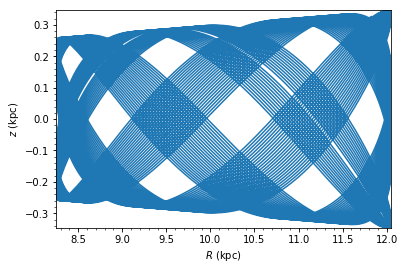

In [5]:
o.plot()
# We can then plot the orbit integration as a function of R and Z.

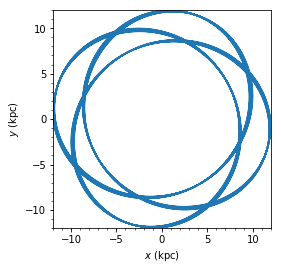

In [6]:
o.plot(d1='x',d2='y')
plt.gca().set_aspect("equal",adjustable="box")

# Or we can choose what kind of plot to make. Like an x-y plot.
# I'm setting the axis to be equal because the resulting image should circle-ish

In [7]:
o.animate(d1=['x','R'],d2=['y','z'],width=800)

# If the plots are not super clear as to what is going on we can
# animate the integration as well. Here I put both plots animated
# next to each other

# Energy Plots and Frequencies

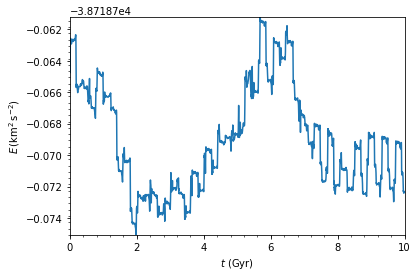

In [8]:
line = o.plotE()

Text(0,0.5,'$(E-E0)/E0$')

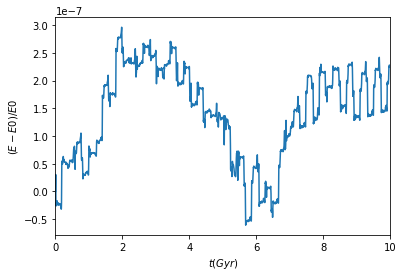

In [9]:
energy = line[0].get_ydata()
time = line[0].get_xdata()
plt.plot(time,(energy-energy[0])/energy[0])
plt.xlim(0,10)
plt.ylim()
plt.xlabel("$t (Gyr)$")
plt.ylabel("$(E-E0)/E0$")